In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os
import re
import numpy as np

# Model performance by training data size

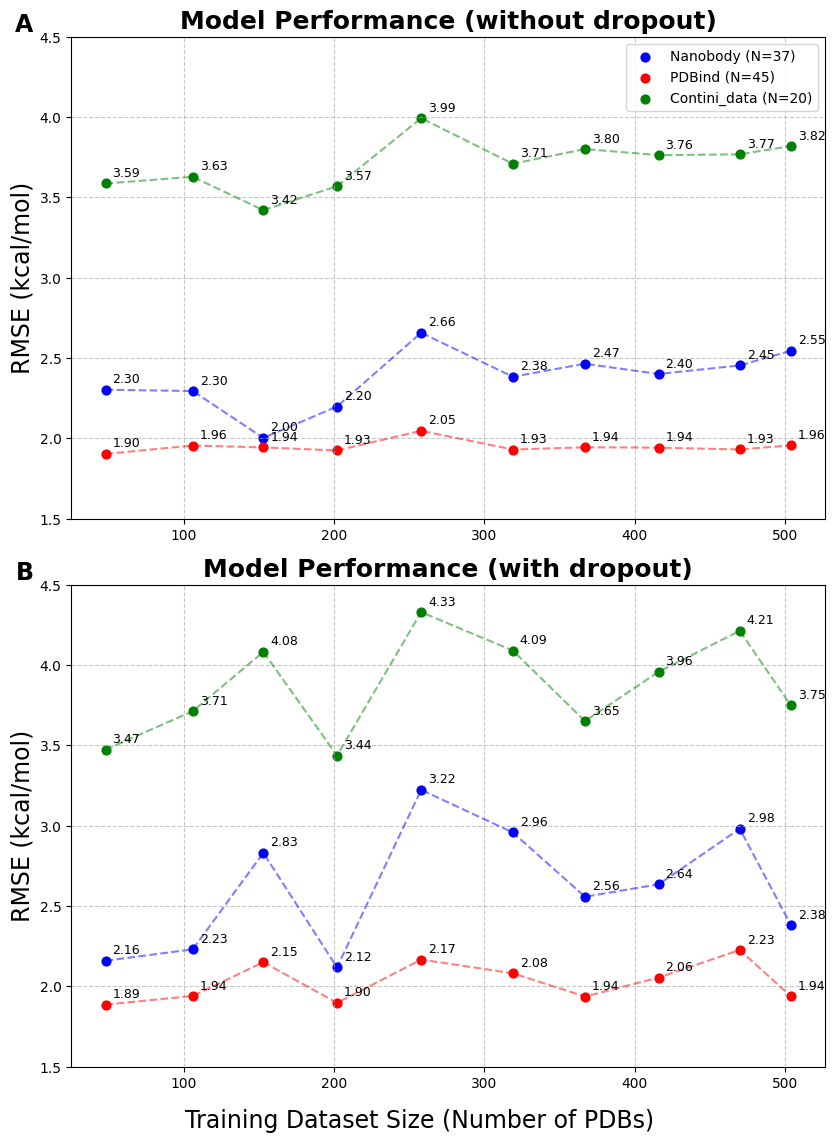

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import re

# Define file paths (update these paths as needed)
file_no_dropout = '/Users/qingshuzhao/Library/CloudStorage/OneDrive-SharedLibraries-UWM/Arjun Saha - qingshu_project/Paper/SI/size/size.csv'
file_dropout = '/Users/qingshuzhao/Library/CloudStorage/OneDrive-SharedLibraries-UWM/Arjun Saha - qingshu_project/Paper/SI/size/size_dropout.csv'

# Function to process a CSV file and extract rmse and training size
def process_csv(filepath):
    df = pd.read_csv(filepath)
    # Extract rmse from metrics string
    df['rmse'] = df['metrics'].apply(lambda x: ast.literal_eval(x)['rmse'])
    # Extract training set size from the filename string
    df['training_size'] = df['training_file'].apply(lambda x: int(re.search(r'top_(\d+)_PDBs', x).group(1)))
    return df

# Read and process both CSV files
df_no_dropout = process_csv(file_no_dropout)
df_dropout = process_csv(file_dropout)

# Define a color scheme for each test dataset
colors = {'Nanobody (N=37)': 'blue', 'PDBind (N=45)': 'red', 'Contini_data (N=20)': 'green'}


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.5, 11.5), sharex=False, sharey=False)  # 2 rows, 1 column

# Plotting function for a learning curve
def plot_learning_curve(ax, df, title, label):
    for dataset in df['test_dataset'].unique():
        dataset_data = df[df['test_dataset'] == dataset]
        # Scatter and line plot for the dataset
        ax.scatter(dataset_data['training_size'], dataset_data['rmse'], 
                   label=dataset, color=colors[dataset], s=40)
        ax.plot(dataset_data['training_size'], dataset_data['rmse'], 
                linestyle='--', color=colors[dataset], alpha=0.5)
        # Annotate each point with its RMSE value
        for _, row in dataset_data.iterrows():
            ax.annotate(f'{row["rmse"]:.2f}', 
                        (row['training_size'], row['rmse']),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    ax.set_title(title, fontsize=18, fontweight='bold')
    #ax.set_xlabel('Training Data Size (Number of PDBs)', fontsize=16)
    ax.set_ylim(1.5, 4.5)
    #ax.set_yticks(np.arange(1.5, 5))
    ax.grid(True, linestyle='--', alpha=0.7)
    # Add subplot label (A or B) in the top left corner of the subplot
    ax.text(-0.05, 1.05, label, transform=ax.transAxes, fontsize=17, fontweight='bold', va='top', ha='right')

# Plot the two learning curves
plot_learning_curve(ax1, df_no_dropout, 'Model Performance (without dropout)', 'A')
plot_learning_curve(ax2, df_dropout, 'Model Performance (with dropout)', 'B')

# Set shared y-axis label and add legend to the second plot
ax1.set_ylabel('RMSE (kcal/mol)', fontsize=17)
ax2.set_ylabel('RMSE (kcal/mol)', fontsize=17)
ax1.legend()
fig.supxlabel("Training Dataset Size (Number of PDBs)", fontsize=17)


# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('/Users/qingshuzhao/Library/CloudStorage/OneDrive-SharedLibraries-UWM/Arjun Saha - qingshu_project/Paper/Figures/Learning_Curve_size.png', dpi=300, bbox_inches='tight')
plt.show()

# Model performance by resolution

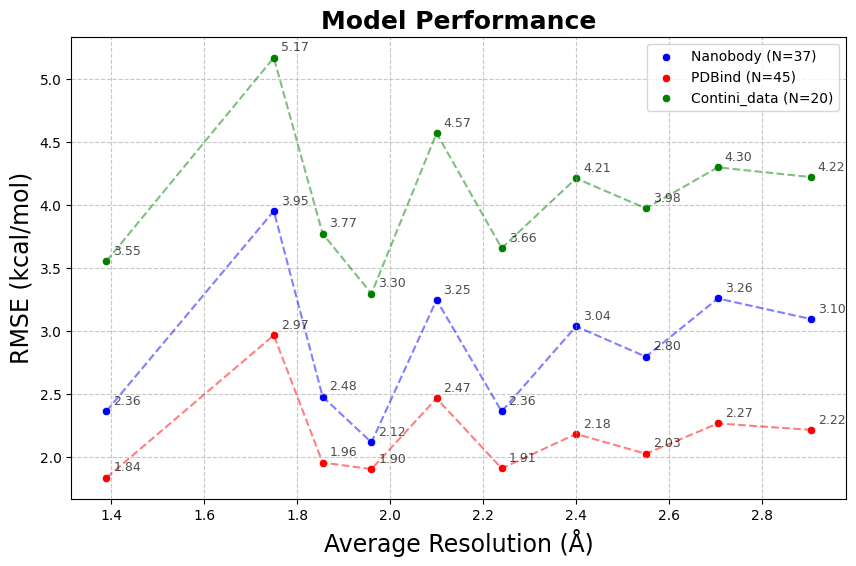

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os

# Load the CSV file
file_path = "/Users/qingshuzhao/Documents/ML_PPI_project/training_results/resolutio_drop_metrics_20250310_202144.csv" 
df = pd.read_csv(file_path)

# Convert 'metrics' from string representation of dict to actual dict
df['metrics'] = df['metrics'].apply(ast.literal_eval)

# Extract RMSE from the metrics dictionary
df['rmse'] = df['metrics'].apply(lambda x: x.get('rmse', None))

# Convert resolution ranges to numeric by taking the average of the range
def extract_resolution_range(res_string):
    # Remove '.csv' and split by '-'
    range_values = res_string.replace('.csv', '').split('-')
    # Convert to float and calculate average
    return (float(range_values[0]) + float(range_values[1])) / 2

df['resolution_avg'] = df['training_file'].apply(extract_resolution_range)

# Create RMSE vs. Resolution scatter plot
plt.figure(figsize=(10, 6))

# Create color palette
palette = sns.color_palette('Set1', n_colors=len(df['test_dataset'].unique()))
color_dict = dict(zip(df['test_dataset'].unique(), palette))

# Define specific colors for each dataset
colors = {'Nanobody (N=37)': 'blue', 'PDBind (N=45)': 'red', 'Contini_data (N=20)': 'green'}

# Plot each dataset
for dataset in df['test_dataset'].unique():
    dataset_data = df[df['test_dataset'] == dataset].sort_values('resolution_avg')
    
    # Scatter plot
    sns.scatterplot(data=dataset_data, x='resolution_avg', y='rmse', 
                    label=dataset, color=colors[dataset])
    
    # Connect points with lines
    plt.plot(dataset_data['resolution_avg'], dataset_data['rmse'], 
            linestyle='--', color=colors[dataset], alpha=0.5)

# Add annotations for each point
for idx, row in df.iterrows():
    plt.annotate(f'{row["rmse"]:.2f}', 
                (row['resolution_avg'], row['rmse']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=9,
                alpha=0.7)

# Labels and title
plt.xlabel("Average Resolution (Å)", fontsize=17)
plt.ylabel("RMSE (kcal/mol)", fontsize=17)
plt.title("Model Performance", fontsize=18, fontweight='bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()



# model tuning evaluation

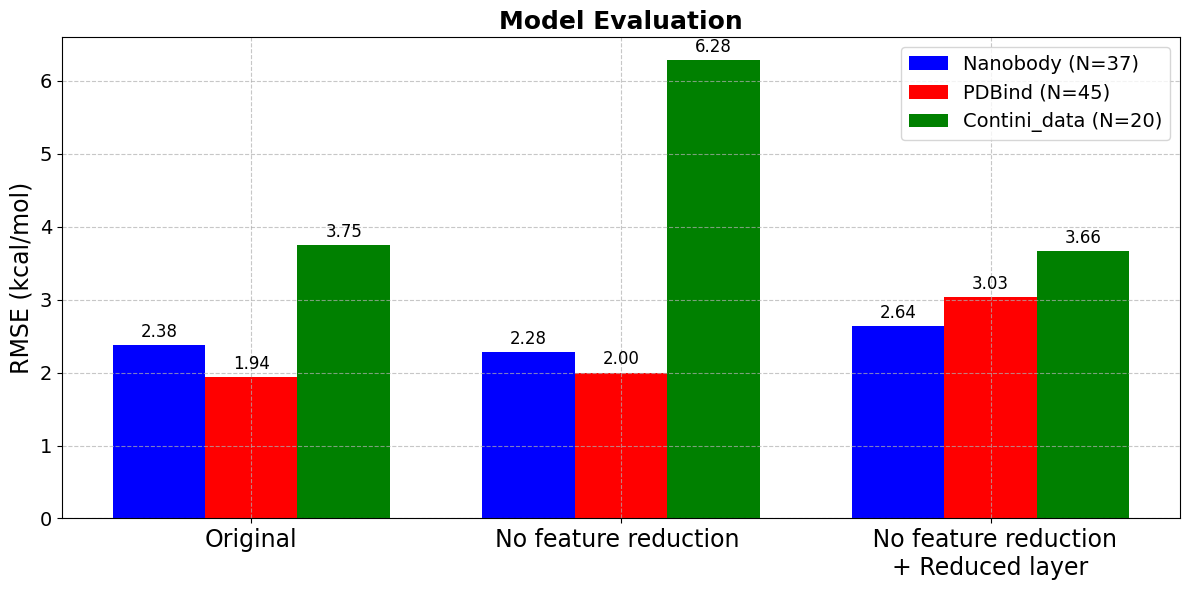

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/Users/qingshuzhao/Library/CloudStorage/OneDrive-SharedLibraries-UWM/Arjun Saha - qingshu_project/Paper/Figures/tuning_metrics.csv')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25
index = np.arange(len(df['Model Configuration']))

# Bars
bar1 = ax.bar(index - bar_width, df['Nanobody'], bar_width, label='Nanobody (N=37)', color='blue')
bar2 = ax.bar(index, df['PDBind'], bar_width, label='PDBind (N=45)', color='red')
bar3 = ax.bar(index + bar_width, df['Contini_data'], bar_width, label='Contini_data (N=20)', color='green')

# Annotations
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=12)

# Labels and formatting
#ax.set_xlabel('Model Configuration')
ax.set_ylabel('RMSE (kcal/mol)', fontsize=17)
ax.set_title('Model Evaluation', fontweight='bold', fontsize=18)
ax.set_xticks(index)
ax.set_xticklabels(["Original", "No feature reduction ", " No feature reduction\n+ Reduced layer"], fontsize=17, rotation=0)
ax.legend(fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)

# Change y-axis tick size
ax.tick_params(axis='y', which='major', labelsize=14)

plt.tight_layout()
plt.show()